In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
class DataGenerator:
    def __int__(self):
        pass

    def getFindDegList(self):
        return [
            [4, 3, 2],
            [3, 2, 1],

            [8, 7, 6],
            [7, 6, 5],
            [6, 5, 0],

            [12, 11, 10],
            [11, 10, 9],

            [16, 15, 14],
            [15, 14, 13],

            [20, 19, 18],
            [19, 18, 17],
            [18, 17, 0],

            [6, 5, 9],
            [10, 9, 5],

            [14, 13, 9],
            [18, 17, 13],
        ]

    def imageGetDeg(self, hand_landmarks, label):
        degList = []

        for n, i in enumerate(self.getFindDegList()):
            p1 = hand_landmarks.landmark[i[0]]
            p2 = hand_landmarks.landmark[i[1]]
            p3 = hand_landmarks.landmark[i[2]]

            deg = self.getDeg(p1, p2, p3)

            degList.append(deg)
        degList.append(label)

        return degList

    def getDeg(self, p1, p2, p3):
        A = self.landmarkToNparray(p1)
        B = self.landmarkToNparray(p2)
        C = self.landmarkToNparray(p3)

        AB = B - A
        BC = C - B

        dot = np.dot(AB, BC)

        normAB = np.linalg.norm(AB)
        normBC = np.linalg.norm(BC)
        angle_rad = np.arccos(dot / (normAB * normBC))

        angle_deg = np.degrees(angle_rad)

        return min(angle_deg, 180 - angle_deg)


    def landmarkToNparray(self, landmark):
        array = np.array([landmark.x, landmark.y, landmark.z])
        return array

In [ ]:
import pandas as pd
import numpy as np

data_path = "/content/drive/Shareddrives/2023 인공지능 모델링 프로젝트/data/data.csv"

In [ ]:
df = pd.read_csv(data_path)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,label
0,4.180266,39.382984,5.845003,3.559500,28.238728,4.531369,2.158596,4.031397,2.181086,5.231499,4.659680,26.895114,85.025627,89.980678,81.105623,80.069341,0.0
1,18.695793,40.142249,5.094160,2.129227,28.513457,3.421851,0.085816,3.258343,1.384106,4.606371,7.318714,35.356139,87.473216,87.526406,76.409421,72.425620,0.0
2,7.804296,54.164513,8.602587,5.456619,34.294114,3.066038,5.421571,1.401004,5.327053,3.663637,2.119198,40.007747,83.702541,89.434963,77.388172,66.223779,0.0
3,2.160568,43.060328,6.647380,4.201977,36.604253,7.063699,3.420155,6.960085,1.958317,6.711954,4.480131,33.887779,81.699394,87.509653,80.008598,70.512175,0.0
4,12.566229,35.548996,4.847611,2.859979,15.109210,2.469584,2.271303,3.453879,0.789902,5.352952,8.172017,33.642691,75.726345,81.140176,73.112035,68.342777,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12471,12.062862,33.842467,4.310661,9.316777,16.311611,12.246170,8.050897,24.039373,83.875319,18.020798,65.397081,73.548910,63.128760,86.054761,85.323911,73.390631,2.0
12472,11.239955,33.241404,3.895593,8.827879,15.801240,11.037895,8.003798,24.860819,80.900228,20.236443,59.400214,79.570144,62.883336,84.227522,84.619465,74.187763,2.0
12473,11.368164,33.332250,4.217700,9.166557,17.795801,12.063681,9.860264,26.337273,82.696618,21.601804,61.602809,76.894048,61.847763,83.817994,82.206835,71.258504,2.0
12474,12.437373,32.109936,4.114565,10.520655,16.405797,13.408117,10.517554,26.212750,79.445150,20.669702,60.106470,75.528107,60.328060,84.513516,82.791716,71.767805,2.0


In [ ]:
data_df = pd.get_dummies(df, columns = ['label']) # 원핫 인코딩
data_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,label_0.0,label_1.0,label_2.0
0,4.180266,39.382984,5.845003,3.559500,28.238728,4.531369,2.158596,4.031397,2.181086,5.231499,4.659680,26.895114,85.025627,89.980678,81.105623,80.069341,1,0,0
1,18.695793,40.142249,5.094160,2.129227,28.513457,3.421851,0.085816,3.258343,1.384106,4.606371,7.318714,35.356139,87.473216,87.526406,76.409421,72.425620,1,0,0
2,7.804296,54.164513,8.602587,5.456619,34.294114,3.066038,5.421571,1.401004,5.327053,3.663637,2.119198,40.007747,83.702541,89.434963,77.388172,66.223779,1,0,0
3,2.160568,43.060328,6.647380,4.201977,36.604253,7.063699,3.420155,6.960085,1.958317,6.711954,4.480131,33.887779,81.699394,87.509653,80.008598,70.512175,1,0,0
4,12.566229,35.548996,4.847611,2.859979,15.109210,2.469584,2.271303,3.453879,0.789902,5.352952,8.172017,33.642691,75.726345,81.140176,73.112035,68.342777,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12471,12.062862,33.842467,4.310661,9.316777,16.311611,12.246170,8.050897,24.039373,83.875319,18.020798,65.397081,73.548910,63.128760,86.054761,85.323911,73.390631,0,0,1
12472,11.239955,33.241404,3.895593,8.827879,15.801240,11.037895,8.003798,24.860819,80.900228,20.236443,59.400214,79.570144,62.883336,84.227522,84.619465,74.187763,0,0,1
12473,11.368164,33.332250,4.217700,9.166557,17.795801,12.063681,9.860264,26.337273,82.696618,21.601804,61.602809,76.894048,61.847763,83.817994,82.206835,71.258504,0,0,1
12474,12.437373,32.109936,4.114565,10.520655,16.405797,13.408117,10.517554,26.212750,79.445150,20.669702,60.106470,75.528107,60.328060,84.513516,82.791716,71.767805,0,0,1


In [ ]:
data_y = data_df[["label_0.0",	"label_1.0",	"label_2.0"]].to_numpy()
data_x = data_df.drop(["label_0.0",	"label_1.0",	"label_2.0"], axis = 1).to_numpy()

data_x.shape, data_y.shape

((12476, 16), (12476, 3))

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=777, shuffle=True)

print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(8733, 16) (3743, 16)
(8733, 3) (3743, 3)


In [ ]:
print(sum(train_y[:, 0]))
print(sum(train_y[:, 1]))
print(sum(train_y[:, 2]))

print()

print(sum(test_y[:, 0]))
print(sum(test_y[:, 1]))
print(sum(test_y[:, 2]))

3000
2705
3028

1288
1225
1230


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

model1.add(
    Dense(30, input_dim = 16, activation="relu", name = "Hidden_1")
)

model1.add(
    Dense(12, activation="relu", name = "Hidden_2")
)

model1.add(
    Dense(8, activation="relu", name = "Hidden_3")
)

model1.add(
    Dense(3, activation="softmax", name = "Output")
)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 30)                510       
                                                                 
 Hidden_2 (Dense)            (None, 12)                372       
                                                                 
 Hidden_3 (Dense)            (None, 8)                 104       
                                                                 
 Output (Dense)              (None, 3)                 27        
                                                                 
Total params: 1,013
Trainable params: 1,013
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_model_1 = model1.fit(train_x, train_y, epochs=100, batch_size=500, validation_split=0.25)

Epoch 1/100
14/14 [==============================] - 1s 11ms/step - loss: 0.3677 - accuracy: 0.6545 - val_loss: 0.3734 - val_accuracy: 0.6465
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3664 - accuracy: 0.6548 - val_loss: 0.3727 - val_accuracy: 0.6456
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.6529 - val_loss: 0.3724 - val_accuracy: 0.6456
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.6485 - val_loss: 0.3716 - val_accuracy: 0.6534
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3644 - accuracy: 0.6545 - val_loss: 0.3717 - val_accuracy: 0.6538
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3637 - accuracy: 0.6531 - val_loss: 0.3707 - val_accuracy: 0.6451
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.6551 - val_loss: 0.3705 - val_accuracy: 0.6442
Epoch 8/100


In [ ]:
score = model1.evaluate(test_x, test_y)

print(f"모델 1 오차 : {score[0] * 100 : .2f}%")
print(f"모델 1 정확도 : {score[1] * 100 : .2f}%")

117/117 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9965
모델 1 오차 :  1.26%
모델 1 정확도 :  99.65%


In [ ]:
model2 = Sequential()

model2.add(
    Dense(30, input_dim = 16, activation="relu", name = "Hidden_1")
)

model2.add(
    Dense(20, activation="relu", name = "Hidden_2")
)

model2.add(
    Dense(10, activation="relu", name = "Hidden_3")
)

model2.add(
    Dense(5, activation="relu", name = "Hidden_4")
)

model2.add(
    Dense(3, activation="softmax", name = "Output")
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 30)                510       
                                                                 
 Hidden_2 (Dense)            (None, 20)                620       
                                                                 
 Hidden_3 (Dense)            (None, 10)                210       
                                                                 
 Hidden_4 (Dense)            (None, 5)                 55        
                                                                 
 Output (Dense)              (None, 3)                 18        
                                                                 
Total params: 1,413
Trainable params: 1,413
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history_model_1 = model2.fit(train_x, train_y, epochs=50, batch_size=500, validation_split=0.25)

Epoch 1/50
14/14 [==============================] - 1s 22ms/step - loss: 7.2492 - accuracy: 0.3118 - val_loss: 1.2515 - val_accuracy: 0.3777
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 1.0345 - accuracy: 0.5305 - val_loss: 0.9862 - val_accuracy: 0.6099
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.9835 - accuracy: 0.6135 - val_loss: 0.9627 - val_accuracy: 0.6328
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.9479 - accuracy: 0.6412 - val_loss: 0.9118 - val_accuracy: 0.6397
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.8589 - accuracy: 0.6462 - val_loss: 0.7774 - val_accuracy: 0.6699
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.7601 - accuracy: 0.6603 - val_loss: 0.7243 - val_accuracy: 0.6625
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.7164 - accuracy: 0.6512 - val_loss: 0.6912 - val_accuracy: 0.6525
Epoch 8/50
14/14 [=

In [ ]:
score = model2.evaluate(test_x, test_y)

print(f"모델 2 오차 : {score[0] * 100 : .2f}%")
print(f"모델 2 정확도 : {score[1] * 100 : .2f}%")

117/117 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.9920
모델 2 오차 :  21.11%
모델 2 정확도 :  99.20%


In [ ]:
# model1.save("/content/drive/Shareddrives/2023 인공지능 모델링 프로젝트/model/model1.hdf5")
model2.save("/content/drive/Shareddrives/2023 인공지능 모델링 프로젝트/model/model2.hdf5")

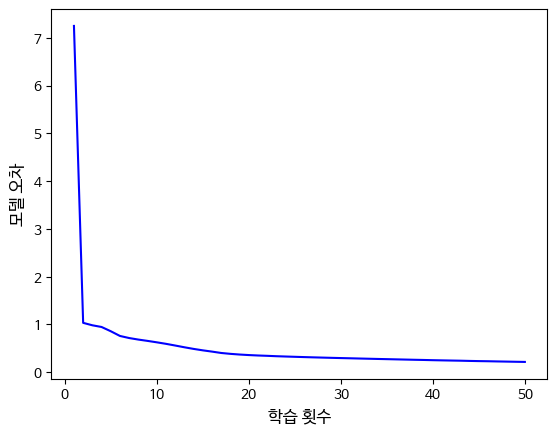

In [ ]:
loss_train = history_model_1.history["loss"]
loss_val = history_model_1.history["val_loss"]

epoch = range(1, len(loss_val) + 1)

plt.plot(epoch, loss_train, "b-")
plt.xlabel("학습 횟수").set_size(12)
plt.ylabel("모델 오차").set_size(12)

plt.savefig("오차 그래프.png")